In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
downsample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/downsample_data.csv')

Model 5: Generic Random Forest Regressor Model for FSO Model

In [5]:
# Set up the data by removing time
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_fso = downsample_data['FSO_Att']
X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X, y_fso, test_size=0.25, random_state=42)
rf_fso = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)

# Store results
results = []
for num_features in range(X.shape[1], 0, -1):
    # Train the model
    rf_fso.fit(X_train_fso, y_train_fso)
    y_pred_fso = rf_fso.predict(X_test_fso)

    # Calculate RMSE and R2
    rmse_fso = round(np.sqrt(mean_squared_error(y_test_fso, y_pred_fso)), 2)
    r2_fso = round(r2_score(y_test_fso, y_pred_fso), 2)
    oob_score_fso = round(rf_fso.oob_score_, 2)

    # Feature Importance
    importances_fso = rf_fso.feature_importances_
    indices_fso = np.argsort(importances_fso)[::-1]

    # Remove the least important feature
    least_important_feature_fso = X_train_fso.columns[indices_fso[-1]]
    print(f"Removing least important feature: {least_important_feature_fso}")

    # Store the performance metrics and the least important feature
    results.append((num_features, least_important_feature_fso, rmse_fso, r2_fso,
                    oob_score_fso))

    X_train_fso = X_train_fso.drop(columns=[least_important_feature_fso])
    X_test_fso = X_test_fso.drop(columns=[least_important_feature_fso])

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Num_Features',
                        'Least_Important_Feature', 'RMSE', 'R2', 'OOB_Score'])

# Display the results
print("Performance metrics after each feature removal:")
print(results_df)

# Find the number of features that gives the best RMSE
optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
print(f"The optimal number of features is: {optimal_features}")

Removing least important feature: Frequency
Removing least important feature: RainIntensity
Removing least important feature: RainIntensityMin
Removing least important feature: WindDirection
Removing least important feature: SYNOPCode
Removing least important feature: WindSpeedMin
Removing least important feature: RainIntensityMax
Removing least important feature: WindSpeed
Removing least important feature: ParticulateMax
Removing least important feature: TemperatureDifference
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: AbsoluteHumidity
Removing least important feature: WindSpeedMax
Removing least important feature: Particulate
Removing least important feature: Time
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: RelativeHumidity
Removing least important feature: VisibilityMin
Removing least important feature: TemperatureMin
Removing least important feature: ParticulateMin
Removing least important featu

In [6]:
results_df_fso1 =  results_df.drop(columns=['Num_Features','OOB_Score'])
results_df_fso1

,Least_Important_Feature,RMSE,R2
0,Frequency,1.79,0.90
1,RainIntensity,1.78,0.90
2,RainIntensityMin,1.79,0.90
3,WindDirection,1.79,0.90
4,SYNOPCode,1.78,0.90
5,WindSpeedMin,1.76,0.90
6,RainIntensityMax,1.76,0.90
7,WindSpeed,1.76,0.90
8,ParticulateMax,1.75,0.91
9,TemperatureDifference,1.74,0.91


Model 6: Generic Extra Trees Regressor for FSO attenuation Model

In [18]:
# Set up the data by removing time
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_fso = downsample_data['FSO_Att']
X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X, y_fso,
                                                test_size=0.25, random_state=42)
# Initialize ExtraTreesRegressor with bootstrap=True
et_fso = ExtraTreesRegressor(n_estimators=100, random_state=42, oob_score=True,
                             bootstrap=True)

# Store results
results = []
for num_features in range(X.shape[1], 0, -1):
    # Train the model
    et_fso.fit(X_train_fso, y_train_fso)
    y_pred_fso = et_fso.predict(X_test_fso)

    # Calculate RMSE and R2
    rmse_fso = round(np.sqrt(mean_squared_error(y_test_fso, y_pred_fso)), 2)
    r2_fso = round(r2_score(y_test_fso, y_pred_fso), 2)
    oob_score_fso = round(et_fso.oob_score_, 2)

    # Feature Importance
    importances_fso = et_fso.feature_importances_
    indices_fso = np.argsort(importances_fso)[::-1]

    # Remove the least important feature
    least_important_feature_fso = X_train_fso.columns[indices_fso[-1]]
    print(f"Removing least important feature: {least_important_feature_fso}")

    # Store the performance metrics and the least important feature
    results.append((num_features, least_important_feature_fso, rmse_fso, r2_fso,
                    oob_score_fso))

    X_train_fso = X_train_fso.drop(columns=[least_important_feature_fso])
    X_test_fso = X_test_fso.drop(columns=[least_important_feature_fso])

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Num_Features',
                        'Least_Important_Feature', 'RMSE', 'R2', 'OOB_Score'])

# Display the results
print("Performance metrics after each feature removal:")
print(results_df)

# Find the number of features that gives the best RMSE
optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
print(f"The optimal number of features is: {13}")

Removing least important feature: Frequency
Removing least important feature: WindDirection
Removing least important feature: RainIntensityMax
Removing least important feature: RainIntensityMin
Removing least important feature: RainIntensity
Removing least important feature: WindSpeed
Removing least important feature: WindSpeedMin
Removing least important feature: SYNOPCode
Removing least important feature: TemperatureDifference
Removing least important feature: WindSpeedMax
Removing least important feature: ParticulateMax
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: Particulate
Removing least important feature: AbsoluteHumidity
Removing least important feature: Time
Removing least important feature: TemperatureMin
Removing least important feature: RelativeHumidity
Removing least important feature: ParticulateMin
Removing least important feature: Temperature
Removing least important feature

In [10]:
results_df_fso2 =  results_df.drop(columns=['Num_Features','OOB_Score'])
results_df_fso2

,Least_Important_Feature,RMSE,R2
0,Frequency,1.61,0.92
1,WindDirection,1.64,0.92
2,RainIntensityMax,1.60,0.92
3,RainIntensityMin,1.60,0.92
4,RainIntensity,1.60,0.92
5,WindSpeed,1.60,0.92
6,WindSpeedMin,1.58,0.92
7,SYNOPCode,1.59,0.92
8,TemperatureDifference,1.57,0.92
9,WindSpeedMax,1.56,0.92


PLOTS

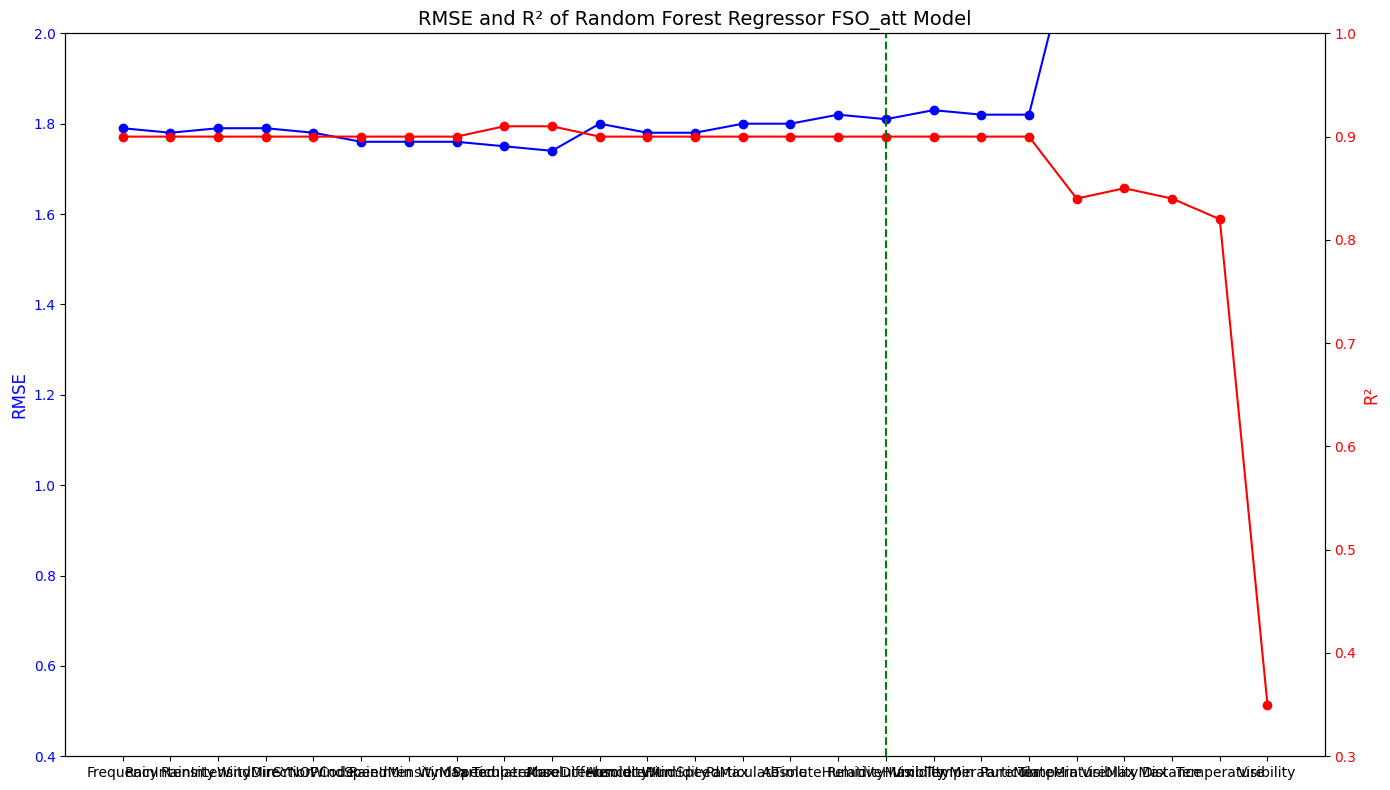

In [15]:
optimal_feature_index = 16

# Plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot RMSE in blue
ax1.plot(results_df_fso1['Least_Important_Feature'], results_df_fso1['RMSE'],
         color='blue', marker='o', label='RMSE')
ax1.set_ylabel('RMSE', color='blue', fontsize=12)
ax1.set_ylim(0.4, 2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for R2 with a shared x-axis
ax2 = ax1.twinx()
ax2.plot(results_df_fso1['Least_Important_Feature'], results_df_fso1['R2'],
         color='red', marker='o', label='R²')
ax2.set_ylabel('R²', color='red', fontsize=12)
ax2.set_ylim(0.3, 1)
ax2.tick_params(axis='y', labelcolor='red')

# Add a vertical green line at the optimal number of features
plt.axvline(x=optimal_feature_index, color='green', linestyle='--',
            label='Optimal Features')

plt.xticks(rotation=45, ha='right', fontsize=10)


# Add title
plt.title('RMSE and R² of Random Forest Regressor FSO_att Model', fontsize=14)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

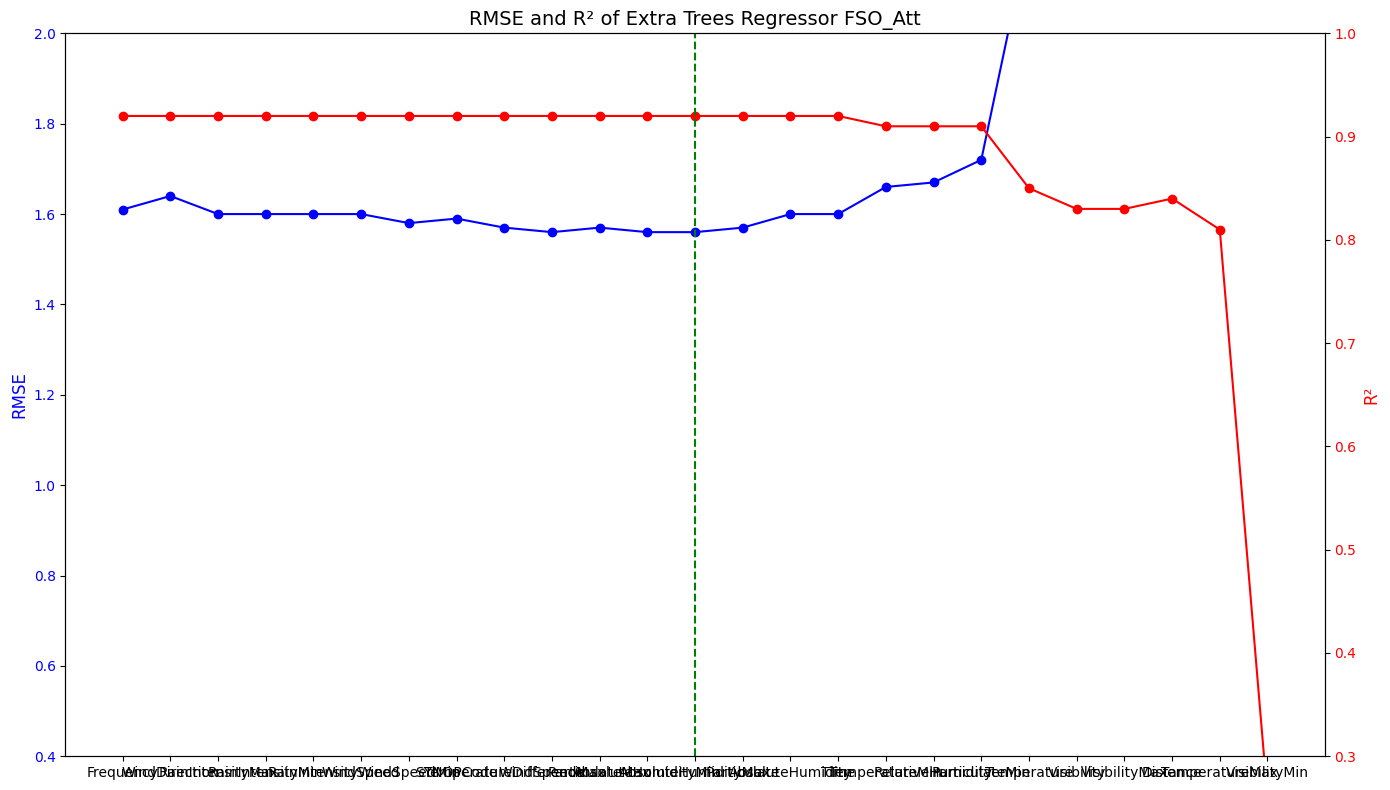

In [16]:
optimal_feature_index = 12

# Plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot RMSE in blue
ax1.plot(results_df_fso2['Least_Important_Feature'], results_df_fso2['RMSE'],
         color='blue', marker='o', label='RMSE')
ax1.set_ylabel('RMSE', color='blue', fontsize=12)
ax1.set_ylim(0.4, 2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for R2 with a shared x-axis
ax2 = ax1.twinx()
ax2.plot(results_df_fso2['Least_Important_Feature'], results_df_fso2['R2'],
         color='red', marker='o', label='R²')
ax2.set_ylabel('R²', color='red', fontsize=12)
ax2.set_ylim(0.3, 1)
ax2.tick_params(axis='y', labelcolor='red')

# Add a vertical green line at the optimal number of features
plt.axvline(x=optimal_feature_index, color='green', linestyle='--',
            label='Optimal Features')

plt.xticks(rotation=45, ha='right', fontsize=10)


# Add title
plt.title('RMSE and R² of Extra Trees Regressor FSO_Att', fontsize=14)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [19]:
# Create a DataFrame with the given data
data = {
    'Model': ['Random Forest Regressor', 'Extra Trees Regressor'],
    'Optimal Features': [16, 13],
    'RMSE': [1.74, 1.56],
    'R2': [0.91, 0.92]
}

results_df = pd.DataFrame(data)

# Display the table
print("Model Performance Comparison:")
print(results_df.to_string(index=False))


Model Performance Comparison:
                  Model  Optimal Features  RMSE   R2
Random Forest Regressor                16  1.74 0.91
  Extra Trees Regressor                13  1.56 0.92


The best Model is Extra Trees Regressor with 13 features